### Time Series Components

### Time Series Decomposition - Zaman Serisi Ayrışımı

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf 
from yahoofinancials import YahooFinancials
# Yahoo Finance, finansal haberler, hisse senedi fiyatları, basın bültenleri ve finansal raporlar hakkında veriler sağlayan bir medya platformudur

import plotly.graph_objects as go
from stldecompose import decompose
 

ModuleNotFoundError: No module named 'yfinance'

In [3]:
thy_df = yf.download ('TKHVY',
                       start='2017-01-01',
                       progress=False)

thy_df.index = pd.to_datetime(apple_df.index)
thy_df


NameError: name 'yf' is not defined

#Data_vis

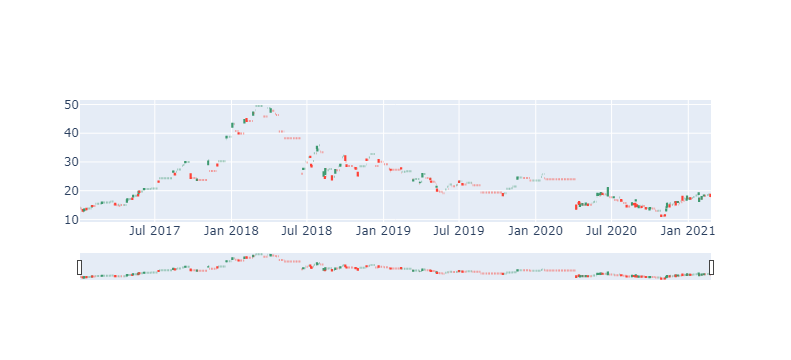

In [49]:
fig = go.Figure(data=[go.Candlestick(x=thy_df.index,
                                    open=thy_df['Open'],
                                    high=thy_df['High'],
                                    low=thy_df['Low'],
                                    close=thy_df['Close'])])
fig.show()


# buradaki kırmızı renkli olanlar açılışın kapanıştan daha yüksek olmasıdır.


# describe_stts

In [4]:
thy_df.describe()


NameError: name 'thy_df' is not defined

### Zaman Serisi Ayrışımı 
### Toplasal Yaklaşım : 
Yi = Ti + Si + Ri

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



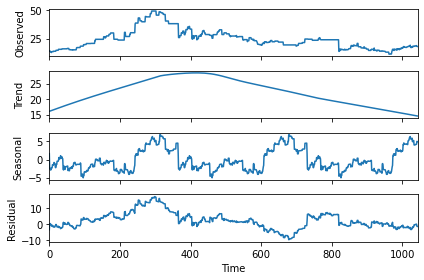

In [51]:
df_close = thy_df["Close"]
decomp = decompose(df_close.values)
decomp.plot().show()

# Zaman serisi ayrışımı aslında bize Trend ve Mevsimselliğin hakkında bilgi verecek o yüzden kapanış değerlerini alıyoruz 
# Biz bu bilgiyi kullanarak doğru modelleme yapmaya çalışacağız, yani zaman serisinin türünü

In [41]:
decomp.seasonal

array([ 1.62609799, -2.59900022, -2.60743221, ...,  4.21457239,
        5.006537  ,  4.96516664])

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



([<matplotlib.axis.XTick at 0x298469a7ac8>,
 [Text(1, 0, '1'),
  Text(91, 0, '91'),
  Text(181, 0, '181'),
  Text(271, 0, '271'),
  Text(361, 0, '361'),
  Text(451, 0, '451'),
  Text(541, 0, '541'),
  Text(631, 0, '631'),
  Text(721, 0, '721'),
  Text(811, 0, '811'),
  Text(901, 0, '901'),
  Text(991, 0, '991')])

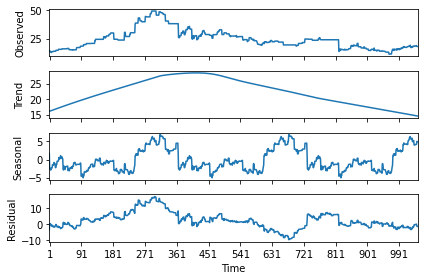

In [52]:
decomp = decompose(df_close.values)
decomp.plot().show()

positions = np.arange(1, len(df_close), 90)
labels = positions

plt.xticks(positions, labels)


# burada ise 90 güne ayırmış oluyoruz yani bir çeyreklik daha fazla yorumlanabilir olmasını sağlıyoruz
# çünkü yukarıda 200 günlük olduğu için 

### Hareketli Ortalama Yöntemi
#### Çok temel bir yöntem olduğunu söyleyebilirim, teknik analiz ile al sat tavsiyeleri oluşturabiliriz.
#### Basit hareketli ortalama = kapanış fiyatının toplam değerlerinin zaman aralığına bölünmesiyle hesaplanır. Mesela 5 günlük ortalama hesaplanırken, 5 günün kapanışları toplanarak 5 e bölünür.

In [53]:
(len(thy_df)//2) # bu şekilde datayı yarıya indirebiliriz, daha iyi görselleştirme için

521

In [54]:
close_thy = thy_df.iloc[(len(apple_df)//2):,3]
close_thy.head()

Date
2019-01-30    27.26
2019-01-31    27.26
2019-02-01    27.26
2019-02-04    27.26
2019-02-05    27.26
Name: Close, dtype: float64

In [56]:
rolling_app5 = close_thy.rolling(window=5).mean() # # rolling = yuvarlama
rolling_app14 = close_thy.rolling(window=14).mean()
rolling_app21 = close_thy.rolling(window=21).mean()

# aldığımız close değerlerini 5windows, 14window, 21windows olarak aldık ve ortalamasını aldık

In [57]:
MAs = pd.concat([close_thy, rolling_app5, rolling_app14, rolling_app21], axis=1)
MAs.columns = ['Close', 'Close_5', 'Close_14', 'Close_21']
MAs.head(30)

# Close feature'u herhangi bir işlem uygulanmamış feature
# Close_5 ise 5 günlük hareketli ortalaması demek oluyor aslında
# böyle kaydırarak 5 günlük, 14 günlük ve 21 günlük veri seti elde etmiş oluyoruz, aslında bilgi verici bir durum diyebiliriz

,Close,Close_5,Close_14,Close_21
Date,,,,
2019-01-30,27.260000,NaN,NaN,NaN
2019-01-31,27.260000,NaN,NaN,NaN
2019-02-01,27.260000,NaN,NaN,NaN
2019-02-04,27.260000,NaN,NaN,NaN
2019-02-05,27.260000,27.260000,NaN,NaN
2019-02-06,27.260000,27.260000,NaN,NaN
2019-02-07,27.260000,27.260000,NaN,NaN
2019-02-08,27.260000,27.260000,NaN,NaN
2019-02-11,27.260000,27.260000,NaN,NaN


NameError: name 'close_thy' is not defined

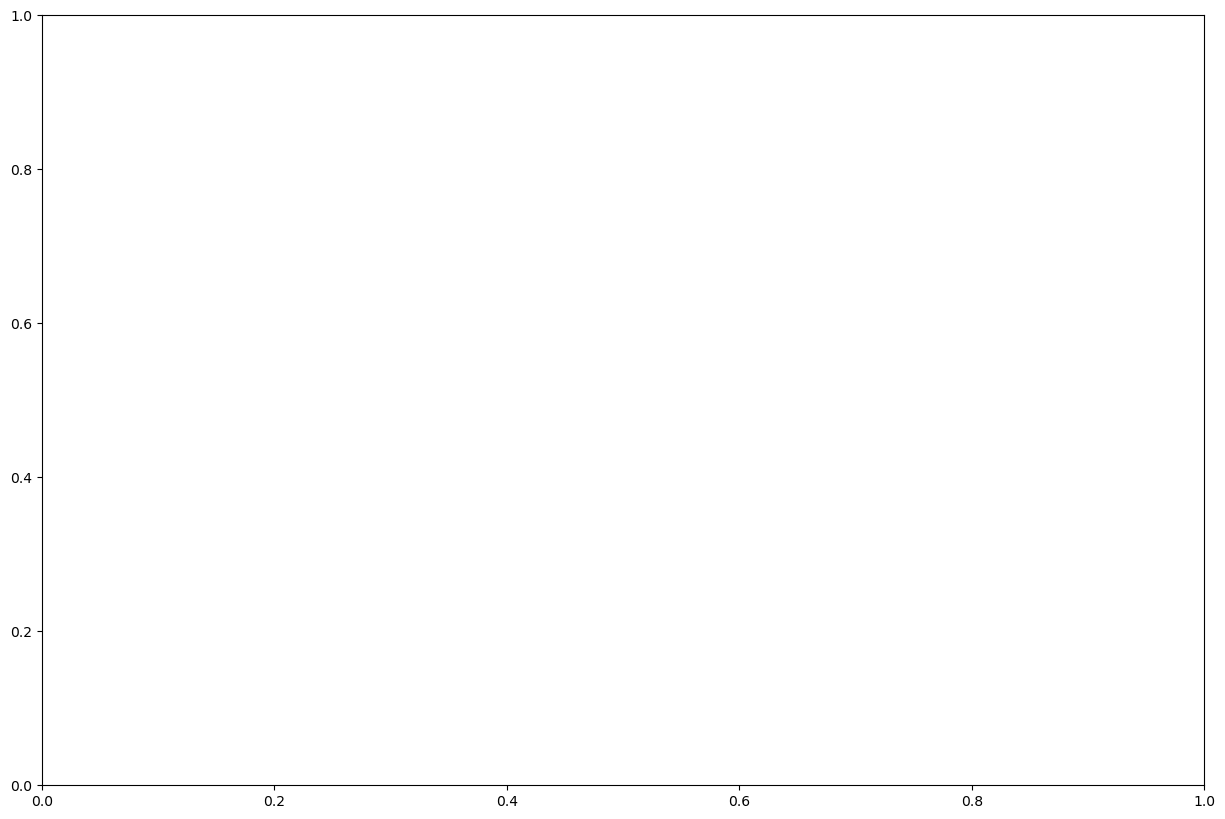

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(close_thy.index, close_thy, label='THY')
ax.plot(rolling_app5.index, rolling_app5, label='5 days rolling')
ax.plot(rolling_app14.index, rolling_app14, label='14 days rolling')
ax.plot(rolling_app21.index, rolling_app21, label='21 days rolling')
ax.legend(loc='upper left')
